# Prediksi Jumlah Kasus COVID-19 di Indonesia
Contoh source code exponential fitting diambil dari: https://github.com/emilyripka/BlogRepo/blob/master/181113_CurveFitting.ipynb

In [106]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [107]:
covid_x=[2,3,4,5,6,7, 8.00 , 9.00 , 10.00 , 11.00 , 12.00 , 13.00 , 14.00 , 15.00 , 16.00 , 17.00 , 18.00 , 19.00 , 20.00 ,
 21.00 , 22.00 , 23.00 , 24.00,25 ]

In [108]:
covid_y=[2,2,2,2,4,4,6,19,27,34,34,69,96,117,134,172,227,309,369,450,514,579,686,790]

In [109]:
# membuat numpy matrix untuk x
np_covid_x=np.array(covid_x)

In [110]:
np_covid_x

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [111]:
covid_x_pred=[2,3,4,5,6,7, 8.00 , 9.00 , 10.00 , 11.00 , 12.00 , 13.00 , 14.00 , 15.00 , 16.00 , 17.00 , 18.00 , 19.00 , 20.00 ,
 21.00 , 22.00 , 23.00 , 24.00 , 25.00 ,26,27,28,29,31]

In [112]:
covid_x_pred_np=np.array(covid_x_pred)

In [113]:
covid_x_pred_np

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 31.])

In [114]:
np_covid_y=np.array(covid_y)

In [115]:
np_covid_y

array([  2,   2,   2,   2,   4,   4,   6,  19,  27,  34,  34,  69,  96,
       117, 134, 172, 227, 309, 369, 450, 514, 579, 686, 790])

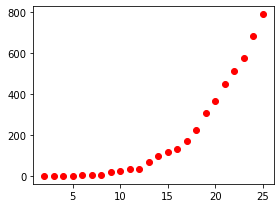

In [116]:
# plot data mentah
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(np_covid_x, np_covid_y, "ro")

#ax1.set_xlim(0,11)
#ax1.set_ylim(-0.1,0.7)

#ax1.set_xlabel("x_array",family="serif",  fontsize=12)
#ax1.set_ylabel("y_array",family="serif",  fontsize=12)

#ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
#ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

#ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
#ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawExponential.png", format="png",dpi=1000)

# Prediksi dengan exponensial + konstanta

In [117]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def exponential(x, a, k, b):
    return a*np.exp(x*k) + b

In [118]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_exponential: this contains the fitting parameters
#   pcov_exponential: estimated covariance of the fitting paramters
#popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, np_covid_x, np_covid_y, p0=[1,0.5, 1])
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, np_covid_x, np_covid_y)

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

In [119]:
# this cell prints the fitting parameters with their errors
print ("pre-exponential factor = %0.2f (+/-) %0.2f" % (popt_exponential[0], perr_exponential[0]))
print ("rate constant = %0.2f (+/-) %0.2f" % (popt_exponential[1], perr_exponential[1]))

pre-exponential factor = 15.66 (+/-) 2.94
rate constant = 0.16 (+/-) 0.01


In [120]:
popt_exponential

array([ 15.66316872,   0.16022513, -43.19952754])

In [121]:
covid_y_pred_np=exponential(covid_x_pred_np, *popt_exponential)

In [122]:
covid_y_pred_np

array([ -21.61962854,  -17.86957952,  -13.46786536,   -8.30124291,
         -2.23679015,    4.88151348,   13.23680101,   23.04402942,
         34.5555099 ,   48.067399  ,   63.92731793,   82.5432958 ,
        104.39426701,  130.04239284,  160.1475242 ,  195.48417766,
        236.96146147,  285.64646425,  342.79170808,  409.86737214,
        488.59911617,  581.01247659,  689.48497759,  816.80729788,
        966.25506661, 1141.67313572, 1347.57449664, 1589.25638634,
       2205.91330408])

In [124]:
counter=0
for x in (covid_x_pred_np):
    print(x,covid_y_pred_np[counter])
    counter=counter+1

2.0 -21.619628538140994
3.0 -17.86957951523911
4.0 -13.46786536301174
5.0 -8.301242910986886
6.0 -2.2367901458613915
7.0 4.881513481303138
8.0 13.2368010053301
9.0 23.044029421767952
10.0 34.555509898723365
11.0 48.06739900178737
12.0 63.927317932196495
13.0 82.54329579883762
14.0 104.39426700820505
15.0 130.04239283930627
16.0 160.14752420143049
17.0 195.48417765903875
18.0 236.9614614670105
19.0 285.6464642545799
20.0 342.79170808007126
21.0 409.86737214285824
22.0 488.59911617396625
23.0 581.0124765900118
24.0 689.4849775930581
25.0 816.8072978818556
26.0 966.2550666142091
27.0 1141.6731357195986
28.0 1347.5744966410325
29.0 1589.2563863432167
31.0 2205.9133040793986


# Prediksi dengan polinom orde 3

In [125]:
# define a fitting function called exponentail which takes
# in the x-data (x) and returns an exponential curve with equation
# a*exp(x*k) which best fits the data
def polinom(x, a, b, c,d):
    return a*x*x*x  + b*x*x + c*x + d

In [126]:
parameter_polinompopt_exponential, pcov_exponential = scipy.optimize.curve_fit(polinom, np_covid_x, np_covid_y)

# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))

In [127]:
covid_prediksi_polinom_y=polinom(covid_x_pred_np, *parameter_polinom)

In [128]:
covid_prediksi_polinom_y

array([   4.39145299,    3.50995912,    2.46542684,    1.7393061 ,
          1.81304686,    3.16809905,    6.28591264,   11.64793757,
         19.73562379,   31.03042127,   46.01377994,   65.16714975,
         88.97198067,  117.90972264,  152.4618256 ,  193.10973952,
        240.33491435,  294.61880003,  356.44284651,  426.28850375,
        504.63722169,  591.9704503 ,  688.76963951,  795.51623928,
        912.69169957, 1040.77747031, 1180.25500147, 1331.605743  ,
       1671.85265694])

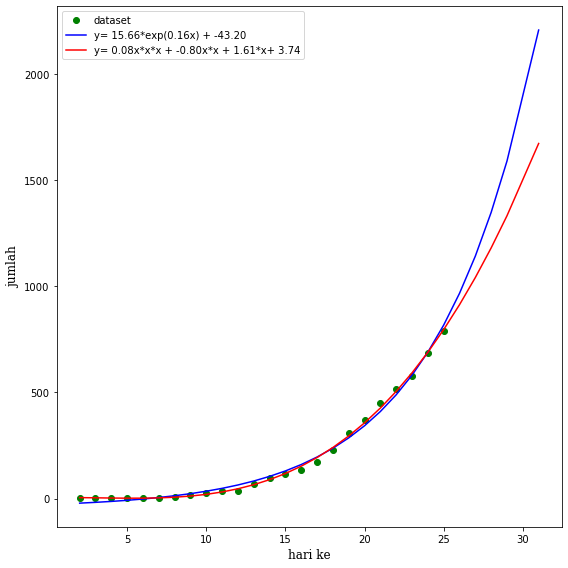

In [130]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
label_exponensial="y= %0.2f*exp(%0.2fx) + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2])
label_polinom="y= %0.2fx*x*x + %0.2fx*x + %0.2f*x+ %0.2f" % (parameter_polinom[0], parameter_polinom[1], parameter_polinom[2], parameter_polinom[3])

ax1.plot(np_covid_x, np_covid_y, "go",label="dataset")
ax1.plot(covid_x_pred_np, covid_y_pred_np,"b-",label=label_exponensial)
ax1.plot(covid_x_pred_np, covid_prediksi_polinom_y,"r-", label=label_polinom)

ax1.set_xlabel("hari ke",family="serif",  fontsize=12)
ax1.set_ylabel("jumlah",family="serif",  fontsize=12)
ax1.legend(loc='best')

fig.tight_layout()
fig.savefig("fit-tedExponential.png", format="png",dpi=1000)